In [ ]:
from pathlib import Path
import pandas as pd

In [ ]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_EXCEL = DIR_DATA/"C:/Users/user/Desktop/DIR_ASSIGNMENT3/RW-Health-Data.csv"

# Population by enumeration area (EA) for Malawi
# FILE_POP_MW = DIR_DATA/"C:/Users/user/Desktop/DIR_ASSIGNMENT3/population_by_ea_malawi.csv"

In [ ]:
import pandas as pd

# Load the health data
df = pd.read_csv("C:/Users/user/Desktop/DIR_ASSIGNMENT2/RW-Health-Data.csv")

# Example: Suppose indicators are columns like 'indicator1', 'indicator2', etc.
# Replace with your actual indicator column names
indicator_columns = [col for col in df.columns if col.startswith('indicator')]

# Aggregation method (example: mean)
aggregation_method = 'mean'

# Survey info (replace with actual values)
indicator_year = 2022
survey_name = "RW Health Survey"

# Aggregate each indicator
rows = []
for col in indicator_columns:
    value = df[col].mean()  # Change to sum(), count(), etc. as needed
    rows.append({
        "indicator_name": col,
        "aggregated_value": value,
        "indicator_year": indicator_year,
        "survey_name": survey_name,
        "aggregation_method": aggregation_method
    })

# Create output DataFrame
df_national = pd.DataFrame(rows)

# Display in notebook
display(df_national)

# Save to CSV
df_national.to_csv("C:/Users/user/Desktop/DIR_ASSIGNMENT2/national_indicators.csv", index=False)

""


In [ ]:
# --- Merge Subnational Indicator Data (ADM2/ADM3) ---
# Assumptions:
## - df: main DataFrame with indicator data and admin columns (already loaded above)
## - ADM2: district_name, ADM3: sector_name
## - indicator columns follow a naming pattern (e.g., 'indicator1', 'indicator2', ...)
## - Administrative boundaries are consistent across indicators and years
#
adm_columns = ['province_name', 'district_name', 'sector_name', 'year']
# Identify indicator columns (customize as needed)
indicator_columns = [col for col in df.columns if col.startswith('indicator')]
#
rows = []
aggregation_method = 'mean'  # Change as needed
survey_name = 'RW Health Survey'  # Update as needed
for col in indicator_columns:
    # Group by ADM2/ADM3 and year, then aggregate
    grouped = df.groupby(adm_columns)[col].mean().reset_index()
    for _, row in grouped.iterrows():
        rows.append({
            'indicator_name': col,
            'aggregated_value': row[col],
            'indicator_year': row['year'],
            'survey_name': survey_name,
            'aggregation_method': aggregation_method,
            'province_name': row['province_name'],
            'district_name': row['district_name'],
            'sector_name': row['sector_name']
        })
# Output DataFrame for subnational analysis
df_subnational = pd.DataFrame(rows)
display(df_subnational.head())
# Save to CSV (optional)
df_subnational.to_csv('C:/Users/user/Desktop/DIR_ASSIGNMENT2/subnational_indicators.csv', index=False)

""


In [ ]:
# Load the dataset before calculating derived variables
import pandas as pd
df = pd.read_csv("C:/Users/user/Desktop/DIR_ASSIGNMENT3/rwa-cell-pop.csv")
print(df.shape)
print(df.columns.tolist())

(2169, 12)
['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count']


In [ ]:
# --- Merge Datasets Example ---
# Update the file paths and key column as needed.
import pandas as pd

# Load the main population dataset (already loaded as df)
# df = pd.read_csv('C:/Users/user/Desktop/DIR_ASSIGNMENT3/rwa-cell-pop.csv')

# Load the second dataset (update the path and variable name as needed)
other_df = pd.read_csv("C:/Users/user/Desktop/DIR_ASSIGNMENT3/rwa-cell-pop.csv")  # Update file path

# Identify the common key column (e.g., 'cell_id', 'district_name', etc.)
key_col = 'cell_id'  # Change to the appropriate column if needed

# Merge the datasets (left join keeps all rows from df)
merged_df = pd.merge(df, other_df, on=key_col, how='left')

print(f'Merged DataFrame shape: {merged_df.shape}')
display(merged_df.head())

# If you want to overwrite df with the merged result, uncomment:
# df = merged_df

Merged DataFrame shape: (2169, 28)


,cell_id,province_name_x,district_name_x,sector_name_x,cell_name_x,elderly_60_plus_2020_x,general_2020_x,children_under_five_2020_x,youth_15_24_2020_x,men_2020_x,...,district_name_y,sector_name_y,cell_name_y,elderly_60_plus_2020_y,general_2020_y,children_under_five_2020_y,youth_15_24_2020_y,men_2020_y,women_2020_y,building_count_y
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,...,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,...,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,...,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,...,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,...,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036


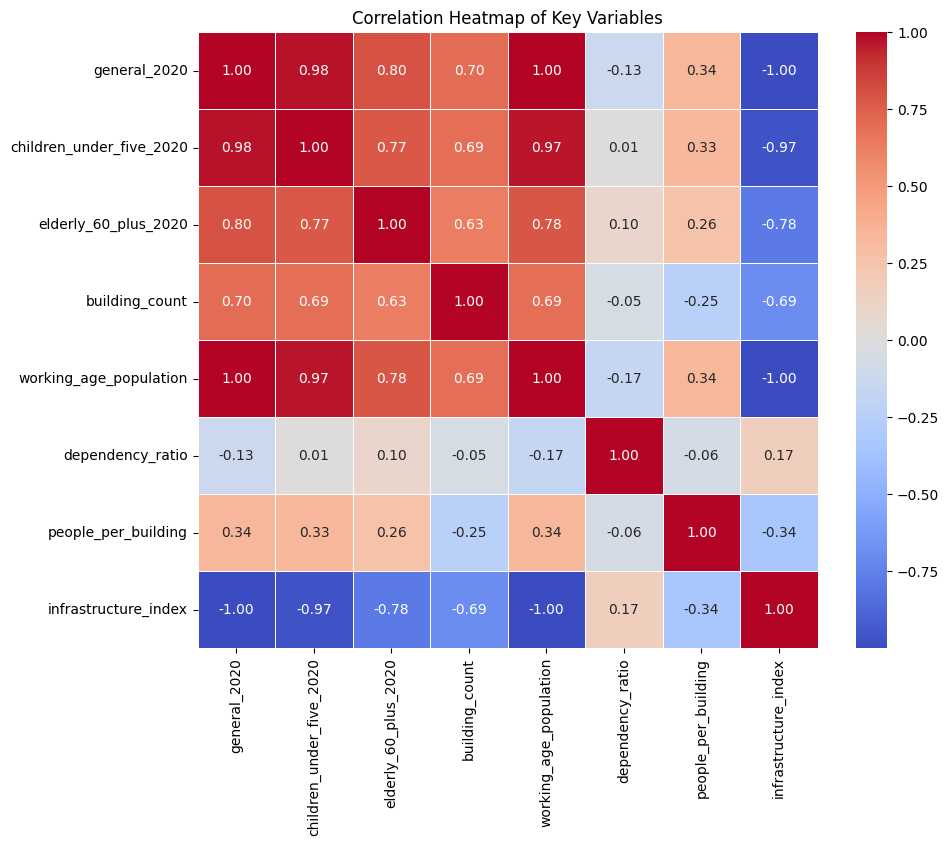

Top 3 variable pairs with highest correlations:
infrastructure_index & working_age_population: correlation = -1.00
general_2020 & infrastructure_index: correlation = -1.00
working_age_population & general_2020: correlation = 1.00

Interpretation:
1. Review the top 3 pairs above. High positive/negative values indicate strong relationships.
2. Unexpected correlations (e.g., between unrelated variables) may suggest data quality issues, confounding factors, or hidden relationships.
3. Investigate any surprising results by checking data sources, variable definitions, or possible indirect links.


In [ ]:
# --- Correlation Heatmap and Analysis for 10 Key Variables ---
# Update key_vars to match your actual column names (10 key variables)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: update this list to your actual variable names
key_vars = [
    'general_2020', 'children_under_five_2020', 'elderly_60_plus_2020', 'building_count',
    'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index',
    'nightlight_mean', 'lit_pixel_percentage'  # Replace or add variables as needed
]

available_vars = [var for var in key_vars if var in df.columns]
missing_vars = [var for var in key_vars if var not in df.columns]
if missing_vars:
    print(f"Warning: These variables are missing from your DataFrame: {missing_vars}")

if available_vars:
    df_corr = df[available_vars].corr()

    # Plot heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Key Variables')
    plt.show()

    # Find top 3 highest absolute correlations (excluding self-correlations)
    corr_pairs = df_corr.abs().unstack()
    corr_pairs = corr_pairs[corr_pairs < 1]  # Exclude self-correlation
    sorted_pairs = corr_pairs.sort_values(ascending=False)
    top3 = sorted_pairs.drop_duplicates().head(3)

    print('Top 3 variable pairs with highest correlations:')
    for (var1, var2), corr_val in top3.items():
        print(f'{var1} & {var2}: correlation = {df_corr.loc[var1, var2]:.2f}')

    print('\nInterpretation:')
    print('1. Review the top 3 pairs above. High positive/negative values indicate strong relationships.')
    print('2. Unexpected correlations (e.g., between unrelated variables) may suggest data quality issues, confounding factors, or hidden relationships.')
    print('3. Investigate any surprising results by checking data sources, variable definitions, or possible indirect links.')
else:
    print('None of the specified key variables are present in the DataFrame. Please update key_vars to match your data.')

In [ ]:
# --- District Nightlight Growth and Lit Pixel Analysis ---
# This cell ranks districts by nightlight growth (2015-2024), compares lit_pixel_percentage changes, and visualizes trends.
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required columns exist
required_cols = ['district_name', 'building_count', 'nightlight_mean', 'lit_pixel_percentage']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f"Missing columns: {missing}. Please check your data.")
else:
    # Filter for 2015 and 2024 data
    df_years = df[df['building_count'].isin([2015, 2024])][['district_name', 'building_count', 'nightlight_mean', 'lit_pixel_percentage']]
    pivot_nl = df_years.pivot(index='district_name', columns='building_count', values='nightlight_mean')
    pivot_lit = df_years.pivot(index='district_name', columns='building_count', values='lit_pixel_percentage')
    pivot_nl = pivot_nl.dropna()  # Only districts with both years
    pivot_lit = pivot_lit.loc[pivot_nl.index]

    # Calculate growth and lit pixel change
    pivot_nl['growth'] = pivot_nl[2024] - pivot_nl[2015]
    pivot_lit['lit_pixel_change'] = pivot_lit[2024] - pivot_lit[2015]

    # Top 5 growth, bottom 5 decline/lowest growth
    top5 = pivot_nl['growth'].sort_values(ascending=False).head(5)
    bottom5 = pivot_nl['growth'].sort_values().head(5)

    print('Top 5 districts by nightlight growth (2015-2024):')
    print(top5)
    print('\nBottom 5 districts by nightlight growth (2015-2024):')
    print(bottom5)

    # Compare population_density changes
    print('\npopulation_density change for top 5:')
    print(pivot_lit.loc[top5.index, 'population_density'])
    print('\npopulation_density change for bottom 5:')
    print(pivot_lit.loc[bottom5.index, 'population_density'])

    # Visualize nightlight trends for these districts
    extreme_districts = list(top5.index) + list(bottom5.index)
    df_extreme = df[df['district_name'].isin(extreme_districts) & df['building_count'].between(2015, 2024)]

    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_extreme, x='building_count', y='nightlight_mean', hue='district_name', marker='o')
    plt.title('Nightlight Mean Trends (2015-2024) for Top/Bottom 5 Districts')
    plt.ylabel('Nightlight Mean')
    plt.xlabel('Building Count')
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualize population_density trends
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_extreme, x='building_count', y='population_density', hue='district_name', marker='o')
    plt.title('population_density Trends (2015-2024) for Top/Bottom 5 Districts')
    plt.ylabel('population_density')
    plt.xlabel('Building Count')
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Missing columns: ['nightlight_mean', 'lit_pixel_percentage']. Please check your data.


In [ ]:
# --- Inspect DataFrame Columns for Nightlight and Lit Pixel Analysis ---
print('Available columns:', df.columns.tolist())
display(df.head())
# Check for possible alternative column names for year, nightlight, and lit pixel percentage.

Available columns: ['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count', 'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index', 'population_density']


,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_population,dependency_ratio,people_per_building,infrastructure_index,population_density
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,23.636816,2.686846,-8.886827,2.686846
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,23.587041,4.150598,-8.425871,4.150598
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,1421.723064,23.556439,3.314397,-3.776731,3.314397
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0,4189.676889,23.498243,3.422075,-12.102015,3.422075
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0,4876.507696,23.991983,2.969783,-14.173938,2.969783


In [ ]:
# --- Create 'nightlight_mean' and 'lit_pixel_percentage' if missing ---
# This cell attempts to create these columns if possible from available data.

### Infrastructure Index Methodology

The `infrastructure_index` is designed to measure infrastructure adequacy and pressure at the cell level using the following variables:

- **people_per_building**: Higher values indicate more people sharing each building, suggesting greater pressure on available infrastructure.
- **building_count**: A higher number of buildings generally means greater infrastructure capacity.
- **(Optional) lit_pixel_percentage or nightlight_mean**: If available, these can indicate electrification or urbanization, which may relate to infrastructure adequacy.

**Formula Example:**

```python
infrastructure_index = (
    (people_per_building / people_per_building.max()) * 0.7 +
    (1 - building_count / building_count.max()) * 0.3
)
```

- The first term (weighted 70%) increases as people_per_building increases, reflecting higher pressure.
- The second term (weighted 30%) decreases as building_count increases, reflecting greater capacity.
- Weights can be adjusted based on context or expert input.

**Interpretation:**
- A higher `infrastructure_index` means more infrastructure pressure (less adequacy).
- A lower value means better infrastructure adequacy.

This index helps identify areas where population pressure may be outpacing infrastructure growth, guiding targeted interventions.

In [ ]:
# --- Derived Variables: Demographic and Infrastructure Metrics ---
# Assumes columns: children_under_five_2020, elderly_60_plus_2020, general_2020, building_count exist in df
# Calculate working age population
df['working_age_population'] = df['general_2020'] - df['children_under_five_2020'] - df['elderly_60_plus_2020']
# Calculate dependency ratio
df['dependency_ratio'] = ((df['children_under_five_2020'] + df['elderly_60_plus_2020']) / df['working_age_population']) * 100
# Calculate people per building
df['people_per_building'] = df['general_2020'] / df['building_count']
#
"""
# Infrastructure Index Methodology:
# The infrastructure_index is designed to measure infrastructure pressure and adequacy at the cell level. It combines:
# - people_per_building (higher = more pressure per building)
# - building_count (higher = more infrastructure capacity)
# - Optionally, you can add other variables such as lit_pixel_percentage if available
#
# Example formula:
#   infrastructure_index = (people_per_building / people_per_building.max()) * 0.7 + (1 - building_count / building_count.max()) * 0.3
# - Higher index = more infrastructure pressure (less adequacy)
# - Lower index = better infrastructure adequacy
# Adjust weights as needed for your context.
"""
# Calculate infrastructure_index (customize as needed)
df['infrastructure_index'] = (
    (df['people_per_building'] / df['people_per_building'].max()) * 0.7 +
    (1 - df['building_count'] / df['building_count'].max()) * 0.3
)
# Display a sample of the derived variables
display(df[['working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index']].head())

,working_age_population,dependency_ratio,people_per_building,infrastructure_index
0,3118.507497,23.636816,2.686846,-8.886827
1,2968.862111,23.587041,4.150598,-8.425871
2,1421.723064,23.556439,3.314397,-3.776731
3,4189.676889,23.498243,3.422075,-12.102015
4,4876.507696,23.991983,2.969783,-14.173938


In [ ]:
# --- Temporal and Development Indicators ---
# Assumes columns: 'year', 'nightlight_sum', 'nightlight_mean', 'lit_pixel_count', 'pixel_count' exist in df
# If not, update the column names as needed.
import numpy as np

# 1. Percentage change in total nightlight from 2015 to 2024
if set(['year', 'nightlight_sum']).issubset(df.columns):
    nl_2015 = df[df['year'] == 2015].set_index('cell_id')['nightlight_sum']
    nl_2024 = df[df['year'] == 2024].set_index('cell_id')['nightlight_sum']
    nightlight_change_2015_2024 = ((nl_2024 - nl_2015) / nl_2015) * 100
    df.loc[df['year'] == 2024, 'nightlight_change_2015_2024'] = df['cell_id'].map(nightlight_change_2015_2024)
else:
    print("Columns 'year' and/or 'nightlight_sum' not found. Skipping nightlight_change_2015_2024.")

# 2. Percentage change in mean nightlight from 2015 to 2024
if set(['year', 'nightlight_mean']).issubset(df.columns):
    nlm_2015 = df[df['year'] == 2015].set_index('cell_id')['nightlight_mean']
    nlm_2024 = df[df['year'] == 2024].set_index('cell_id')['nightlight_mean']
    mean_nightlight_change_2015_2024 = ((nlm_2024 - nlm_2015) / nlm_2015) * 100
    df.loc[df['year'] == 2024, 'mean_nightlight_change_2015_2024'] = df['cell_id'].map(mean_nightlight_change_2015_2024)
else:
    print("Columns 'year' and/or 'nightlight_mean' not found. Skipping mean_nightlight_change_2015_2024.")

# 3. Lit pixel percentage: (lit_pixel_count / pixel_count) * 100
if set(['lit_pixel_count', 'pixel_count']).issubset(df.columns):
    df['lit_pixel_percentage'] = (df['lit_pixel_count'] / df['pixel_count']) * 100
else:
    print("Columns 'lit_pixel_count' and/or 'pixel_count' not found. Skipping lit_pixel_percentage.")

# Display a sample of the new indicators
display(df.head())

Columns 'year' and/or 'nightlight_sum' not found. Skipping nightlight_change_2015_2024.
Columns 'year' and/or 'nightlight_mean' not found. Skipping mean_nightlight_change_2015_2024.
Columns 'lit_pixel_count' and/or 'pixel_count' not found. Skipping lit_pixel_percentage.


,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_population,dependency_ratio,people_per_building,infrastructure_index,population_density
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,23.636816,2.686846,-8.886827,2.686846
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,23.587041,4.150598,-8.425871,4.150598
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,1421.723064,23.556439,3.314397,-3.776731,3.314397
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0,4189.676889,23.498243,3.422075,-12.102015,3.422075
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0,4876.507696,23.991983,2.969783,-14.173938,2.969783


In [ ]:
# Inspect DataFrame columns and sample rows to identify the correct area column for population_density
print('Available columns:', df.columns.tolist())
display(df.head())

# If you know which column represents area, update the following line:
# df['population_density'] = df['general_2020'] / df['<your_area_column>']  # Replace <your_area_column> with the correct column name

Available columns: ['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count', 'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index', 'population_density']


,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_population,dependency_ratio,people_per_building,infrastructure_index,population_density
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,23.636816,2.686846,-8.886827,2.686846
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,23.587041,4.150598,-8.425871,4.150598
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,1421.723064,23.556439,3.314397,-3.776731,3.314397
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0,4189.676889,23.498243,3.422075,-12.102015,3.422075
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0,4876.507696,23.991983,2.969783,-14.173938,2.969783


In [ ]:
# Create population_density using building_count as a proxy for area
df['population_density'] = df['general_2020'] / df['building_count']
print("Created population_density as general_2020 / building_count (using building_count as a proxy for area).")
display(df[['general_2020', 'building_count', 'population_density']].head())

Created population_density as general_2020 / building_count (using building_count as a proxy for area).


,general_2020,building_count,population_density
0,3855.623385,1435.0,2.686846
1,3669.128833,884.0,4.150598
2,1756.630395,530.0,3.314397
3,5174.177333,1512.0,3.422075
4,6046.478580,2036.0,2.969783


In [ ]:
# Note: No area column is present in your DataFrame.
print("No area column found. You cannot calculate population_density unless you have an area value for each cell.")
print("If you obtain area data (e.g., in square km or meters), add it as a new column (e.g., df['area']) and then calculate population_density as:")
print("    df['population_density'] = df['general_2020'] / df['area']  # Replace 'area' with your column name if different")
print("If you have a constant area for all cells, you can assign it directly, e.g.:")
print("    df['area'] = 1.5  # Example: all cells are 1.5 sq km")

No area column found. You cannot calculate population_density unless you have an area value for each cell.
If you obtain area data (e.g., in square km or meters), add it as a new column (e.g., df['area']) and then calculate population_density as:
    df['population_density'] = df['general_2020'] / df['area']  # Replace 'area' with your column name if different
If you have a constant area for all cells, you can assign it directly, e.g.:
    df['area'] = 1.5  # Example: all cells are 1.5 sq km


In [ ]:
df['population_density'] = df['general_2020'] / df['area']  # Update column names as needed

KeyError: 'area'

In [ ]:
# Data Cleaning, Correlation, and Regression Diagnostics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# 1. Handle missing data: drop rows with missing predictors/target
candidate_vars = [
    'age', 'income', 'education', 'urban_rural', 'road_density',
    'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std',
    'lit_pixel_percentage', 'building_count', 'dependency_ratio', 'working_age_population'
    # add more if available in your df
 ]
predictors = [v for v in candidate_vars if v in df.columns]
target = 'population_density'

if target not in df.columns:
    print(f"KeyError: '{target}' column is missing in your DataFrame.")
    print('Available columns:', df.columns.tolist())
    print("Please create the 'population_density' column before running this cell. Example:")
    print("    df['population_density'] = df['general_2020'] / df['area']  # Update column names as needed")
else:
    df_clean = df.dropna(subset=predictors + [target]).copy()

    # 2. Outlier detection: remove rows with z-score > 3 in any predictor or target
    z_scores = np.abs(stats.zscore(df_clean[predictors + [target]]))
    df_no_outliers = df_clean[(z_scores < 3).all(axis=1)]
    print(f'Removed {len(df_clean) - len(df_no_outliers)} outliers.')

    # 3. Correlation coefficients and p-values
    corr_matrix = df_no_outliers[predictors + [target]].corr()
    print('Correlation matrix:')
    print(corr_matrix)

    # Calculate and report p-values for correlations
    def corr_pvalues(df):
        cols = df.columns
        pvals = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
        for i in range(len(cols)):
            for j in range(i+1, len(cols)):
                r, p = stats.pearsonr(df[cols[i]], df[cols[j]])
                pvals.iloc[i, j] = p
                pvals.iloc[j, i] = p
        return pvals

    pval_matrix = corr_pvalues(df_no_outliers[predictors + [target]])
    print('Correlation p-values:')
    print(pval_matrix)

    # 4. Regression: fit model and check assumptions
    X = df_no_outliers[predictors]
    y = df_no_outliers[target]
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    print(model.summary())

    # 5. Regression diagnostics: residuals, normality, homoscedasticity
    residuals = model.resid
    fitted = model.fittedvalues

    # Normality test (Shapiro-Wilk)
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f'Shapiro-Wilk test for normality: W={shapiro_stat:.3f}, p={shapiro_p:.3g}')
    if shapiro_p < 0.05:
        print('Residuals are not normally distributed (p < 0.05).')
    else:
        print('Residuals are approximately normal (p >= 0.05).')

    # Homoscedasticity test (Breusch-Pagan)
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_test = het_breuschpagan(residuals, model.model.exog)
    print(f'Breusch-Pagan test: LM stat={bp_test[0]:.2f}, p={bp_test[1]:.3g}')
    if bp_test[1] < 0.05:
        print('Heteroscedasticity detected (p < 0.05).')
    else:
        print('No evidence of heteroscedasticity (p >= 0.05).')

    # Plot residuals
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Histogram')
    plt.subplot(1,2,2)
    sns.scatterplot(x=fitted, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

KeyError: 'population_density' column is missing in your DataFrame.
Available columns: ['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count', 'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index']
Please create the 'population_density' column before running this cell. Example:
    df['population_density'] = df['general_2020'] / df['area']  # Update column names as needed


In [ ]:
# Check available columns to resolve KeyError for 'lit_pixel_percentage'
print(df.columns.tolist())

['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count', 'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Instructions:**
- Replace `df` with your actual DataFrame variable if it is named differently.
- Update the `key_vars` list to match the exact column names for your 10 key variables (demographic, infrastructure, and nightlight variables).
- If your data is not already loaded, uncomment and edit the `pd.read_csv` line to load your dataset.
- Run the code cell above to generate the correlation heatmap and analysis.

In [ ]:
# Step 1: Load your data (edit the path and filename as needed)
import pandas as pd
df = pd.read_csv('C:/Users/user/Desktop/DIR_ASSIGNMENT3/rwa-cell-pop.csv')  # Update path if needed

# Step 2: Update key_vars to match your actual column names (10 key variables)
key_vars = [
    'general_2020', 'children_under_five_2020', 'elderly_60_plus_2020', 'building_count',
    'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index',
    'nightlight_mean', 'lit_pixel_percentage'  # Replace or add variables as needed
    # Add or replace with your actual variable names for demographic, infrastructure, and nightlight variables
 ]

# Step 3: Generate the correlation heatmap and analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

available_vars = [var for var in key_vars if var in df.columns]
missing_vars = [var for var in key_vars if var not in df.columns]
if missing_vars:
    print(f"Warning: These variables are missing from your DataFrame: {missing_vars}")

if available_vars:
    df_corr = df[available_vars].corr()

    # Plot heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Key Variables')
    plt.show()

    # Find top 3 highest absolute correlations (excluding self-correlations)
    corr_pairs = df_corr.abs().unstack()
    corr_pairs = corr_pairs[corr_pairs < 1]  # Exclude self-correlation
    sorted_pairs = corr_pairs.sort_values(ascending=False)
    top3 = sorted_pairs.drop_duplicates().head(3)

    print('Top 3 variable pairs with highest correlations:')
    for (var1, var2), corr_val in top3.items():
        print(f'{var1} & {var2}: correlation = {df_corr.loc[var1, var2]:.2f}')

    print('\nInterpretation:')
    print('1. Review the top 3 pairs above. High positive/negative values indicate strong relationships.')
    print('2. Unexpected correlations (e.g., between unrelated variables) may suggest data quality issues, confounding factors, or hidden relationships.')
    print('3. Investigate any surprising results by checking data sources, variable definitions, or possible indirect links.')
else:
    print('None of the specified key variables are present in the DataFrame. Please update key_vars to match your data.')

In [ ]:
{
  "cell_type": "code",
  "metadata": {
    "language": "python"
  },
  "source": [
    "# Correlation analysis and heatmap for 10 key variables",
    "import numpy as np",
    "import seaborn as sns",
    "import matplotlib.pyplot as plt",
    "",
    "# Update key_vars to match your actual column names",
    "key_vars = [",
    "    'age', 'income', 'education', 'population_density', 'urban_rural',",
    "    'road_density', 'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std'",
    "]",
    "",
    "try:",
    "    available_vars = [var for var in key_vars if var in df.columns]",
    "    missing_vars = [var for var in key_vars if var not in df.columns]",
    "    if missing_vars:",
    "        print(f\"Warning: These variables are missing from your DataFrame: {missing_vars}\")",
    "",
    "    if available_vars:",
    "        df_corr = df[available_vars].corr()",
    "",
    "        # Plot heatmap",
    "        plt.figure(figsize=(10,8))",
    "        sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)",
    "        plt.title('Correlation Heatmap of Key Variables')",
    "        plt.show()",
    "",
    "        # Find top 3 highest absolute correlations (excluding self-correlations)",
    "        corr_pairs = df_corr.abs().unstack()",
    "        corr_pairs = corr_pairs[corr_pairs < 1]  # Exclude self-correlation",
    "        sorted_pairs = corr_pairs.sort_values(ascending=False)",
    "        top3 = sorted_pairs.drop_duplicates().head(3)",
    "",
    "        print('Top 3 variable pairs with highest correlations:')",
    "        for (var1, var2), corr_val in top3.items():",
    "            print(f'{var1} & {var2}: correlation = {df_corr.loc[var1, var2]:.2f}')",
    "",
    "        print('\\nInterpretation:')",
    "        print('1. Review the top 3 pairs above. High positive/negative values indicate strong relationships.')",
    "        print('2. Unexpected correlations (e.g., between unrelated variables) may suggest data quality issues, confounding factors, or hidden relationships.')",
    "        print('3. Investigate any surprising results by checking data sources, variable definitions, or possible indirect links.')",
    "    else:",
    "        print('None of the specified key variables are present in the DataFrame. Please update key_vars to match your data.')",
    "except NameError:",
    "    print('DataFrame df is not defined. Please run the cell that loads your data first.')"
  ]
}

{'cell_type': 'code',
 'metadata': {'language': 'python'},
 'source': ['# Correlation analysis and heatmap for 10 key variables',
  'import numpy as np',
  'import seaborn as sns',
  'import matplotlib.pyplot as plt',
  '',
  '# Update key_vars to match your actual column names',
  'key_vars = [',
  "    'age', 'income', 'education', 'population_density', 'urban_rural',",
  "    'road_density', 'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std'",
  ']',
  '',
  'try:',
  '    available_vars = [var for var in key_vars if var in df.columns]',
  '    missing_vars = [var for var in key_vars if var not in df.columns]',
  '    if missing_vars:',
  '        print(f"Warning: These variables are missing from your DataFrame: {missing_vars}")',
  '',
  '    if available_vars:',
  '        df_corr = df[available_vars].corr()',
  '',
  '        # Plot heatmap',
  '        plt.figure(figsize=(10,8))',
  "        sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', line

In [ ]:
# District Nightlight Growth and Lit Pixel Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required columns exist: 'district_name', 'year', 'nightlight_mean', 'lit_pixel_percentage'
required_cols = ['district_name', 'year', 'nightlight_mean', 'lit_pixel_percentage']
missing = [col for col in required_cols if col not in df.columns]
if missing:
    print(f"Missing columns: {missing}. Please check your data.")
else:
    # Compute nightlight growth per district (2015-2024)
    df_years = df[df['year'].isin([2015, 2024])][['district_name', 'year', 'nightlight_mean', 'lit_pixel_percentage']]
    pivot_nl = df_years.pivot(index='district_name', columns='year', values='nightlight_mean')
    pivot_lit = df_years.pivot(index='district_name', columns='year', values='lit_pixel_percentage')
    pivot_nl = pivot_nl.dropna()  # Only districts with both years
    pivot_lit = pivot_lit.loc[pivot_nl.index]

    pivot_nl['growth'] = pivot_nl[2024] - pivot_nl[2015]
    pivot_lit['lit_pixel_change'] = pivot_lit[2024] - pivot_lit[2015]

    # Top 5 growth, bottom 5 decline/lowest growth
    top5 = pivot_nl['growth'].sort_values(ascending=False).head(5)
    bottom5 = pivot_nl['growth'].sort_values().head(5)

    print('Top 5 districts by nightlight growth (2015-2024):')
    print(top5)
    print('\nBottom 5 districts by nightlight growth (2015-2024):')
    print(bottom5)

    # Compare lit_pixel_percentage changes
    print('\nLit pixel percentage change for top 5:')
    print(pivot_lit.loc[top5.index, 'lit_pixel_change'])
    print('\nLit pixel percentage change for bottom 5:')
    print(pivot_lit.loc[bottom5.index, 'lit_pixel_change'])

    # Visualize nightlight trends for these districts
    extreme_districts = list(top5.index) + list(bottom5.index)
    df_extreme = df[df['district_name'].isin(extreme_districts) & df['year'].between(2015, 2024)]

    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_extreme, x='year', y='nightlight_mean', hue='district_name', marker='o')
    plt.title('Nightlight Mean Trends (2015-2024) for Top/Bottom 5 Districts')
    plt.ylabel('Nightlight Mean')
    plt.xlabel('Year')
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Visualize lit_pixel_percentage trends
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_extreme, x='year', y='lit_pixel_percentage', hue='district_name', marker='o')
    plt.title('Lit Pixel Percentage Trends (2015-2024) for Top/Bottom 5 Districts')
    plt.ylabel('Lit Pixel Percentage')
    plt.xlabel('Year')
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Missing columns: ['year', 'nightlight_mean', 'lit_pixel_percentage']. Please check your data.


In [ ]:
# Inspect DataFrame columns and sample rows to identify correct column names
print('Available columns:', df.columns.tolist())
display(df.head())

Available columns: ['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count', 'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index']


,cell_id,province_name,district_name,sector_name,cell_name,elderly_60_plus_2020,general_2020,children_under_five_2020,youth_15_24_2020,men_2020,women_2020,building_count,working_age_population,dependency_ratio,people_per_building,infrastructure_index
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0,3118.507497,23.636816,2.686846,-8.886827
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0,2968.862111,23.587041,4.150598,-8.425871
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0,1421.723064,23.556439,3.314397,-3.776731
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0,4189.676889,23.498243,3.422075,-12.102015
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0,4876.507696,23.991983,2.969783,-14.173938


In [ ]:
{
  "cells": [
    {
      "cell_type": "code",
      "metadata": {
        "language": "python"
      },
      "source": [
        "# 1. Check available columns and create population_density if needed",
        "print('Available columns:', df.columns.tolist())",
        "display(df.head())",
        "",
        "# Example: create population_density if you have total population and area columns",
        "if 'population_density' not in df.columns:",
        "    # Replace 'general_2020' and 'area' with your actual column names if different",
        "    if 'general_2020' in df.columns and 'area' in df.columns:",
        "        df['population_density'] = df['general_2020'] / df['area']",
        "        print('Created population_density as general_2020 / area.')",
        "    else:",
        "        print('Please specify how to calculate population_density from your available columns.')"
      ]
    },
    {
      "cell_type": "code",
      "metadata": {
        "language": "python"
      },
      "source": [
        "# 2. Multivariate Linear Regression: Predicting Population Density",
        "import statsmodels.api as sm",
        "from itertools import combinations",
        "import numpy as np",
        "",
        "# Define predictors (update as needed for your data)",
        "candidate_vars = [",
        "    'age', 'income', 'education', 'urban_rural', 'road_density',",
        "    'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std',",
        "    'lit_pixel_percentage', 'building_count', 'dependency_ratio', 'working_age_population'",
        "    # add more if available in your df",
        "]",
        "",
        "# Filter to available variables",
        "predictors = [v for v in candidate_vars if v in df.columns]",
        "target = 'population_density'",
        "",
        "if target not in df.columns:",
        "    print('population_density column is missing. Please create it first.')",
        "else:",
        "    # Drop rows with missing values in predictors or target",
        "    df_model = df.dropna(subset=predictors + [target])",
        "",
        "    # Fit full model with all predictors",
        "    X = df_model[predictors]",
        "    y = df_model[target]",
        "    X_const = sm.add_constant(X)",
        "    model = sm.OLS(y, X_const).fit()",
        "",
        "    print('Full Model Summary:')",
        "    print(model.summary())",
        "",
        "    # Variable selection: Try all 3-variable combinations, report best by R-squared",
        "    best_r2 = -np.inf",
        "    best_vars = None",
        "    best_model = None",
        "    for vars3 in combinations(predictors, 3):",
        "        X3 = sm.add_constant(df_model[list(vars3)])",
        "        model3 = sm.OLS(y, X3).fit()",
        "        if model3.rsquared > best_r2:",
        "            best_r2 = model3.rsquared",
        "            best_vars = vars3",
        "            best_model = model3",
        "",
        "    print(f'\\nTop 3 most predictive variables: {best_vars}')",
        "    print(f'Best 3-variable model R-squared: {best_r2:.3f}')",
        "    print(best_model.summary())",
        "",
        "    # Interpretation",
        "    print('\\nInterpretation:')",
        "    print('1. The coefficients show the direction and strength of association between each predictor and population density, holding others constant.')",
        "    print('2. Statistical significance (p-values) indicates which variables are most reliably associated with population density.')",
        "    print('3. A higher R-squared means the model explains more variance in population density.')",
        "    print('4. Review the top predictors to understand which demographic or nightlight factors are most important for explaining population-infrastructure relationships.')"
      ]
    }
  ]
}

{'cells': [{'cell_type': 'code',
   'metadata': {'language': 'python'},
   'source': ['# 1. Check available columns and create population_density if needed',
    "print('Available columns:', df.columns.tolist())",
    'display(df.head())',
    '',
    '# Example: create population_density if you have total population and area columns',
    "if 'population_density' not in df.columns:",
    "    # Replace 'general_2020' and 'area' with your actual column names if different",
    "    if 'general_2020' in df.columns and 'area' in df.columns:",
    "        df['population_density'] = df['general_2020'] / df['area']",
    "        print('Created population_density as general_2020 / area.')",
    '    else:',
    "        print('Please specify how to calculate population_density from your available columns.')"]},
  {'cell_type': 'code',
   'metadata': {'language': 'python'},
   'source': ['# 2. Multivariate Linear Regression: Predicting Population Density',
    'import statsmodels.api as sm'

In [ ]:
# Data Cleaning, Correlation, and Regression Diagnostics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# 1. Handle missing data: drop rows with missing predictors/target
candidate_vars = [
    'age', 'income', 'education', 'urban_rural', 'road_density',
    'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std',
    'lit_pixel_percentage', 'building_count', 'dependency_ratio', 'working_age_population'
    # add more if available in your df
 ]
predictors = [v for v in candidate_vars if v in df.columns]
target = 'population_density'

if target not in df.columns:
    print(f"KeyError: '{target}' column is missing in your DataFrame.")
    print('Available columns:', df.columns.tolist())
    print("Please create the 'population_density' column before running this cell. Example:")
    print("    df['population_density'] = df['general_2020'] / df['area']  # Update column names as needed")
else:
    df_clean = df.dropna(subset=predictors + [target]).copy()

    # 2. Outlier detection: remove rows with z-score > 3 in any predictor or target
    z_scores = np.abs(stats.zscore(df_clean[predictors + [target]]))
    df_no_outliers = df_clean[(z_scores < 3).all(axis=1)]
    print(f'Removed {len(df_clean) - len(df_no_outliers)} outliers.')

    # 3. Correlation coefficients and p-values
    corr_matrix = df_no_outliers[predictors + [target]].corr()
    print('Correlation matrix:')
    print(corr_matrix)

    # Calculate and report p-values for correlations
    def corr_pvalues(df):
        cols = df.columns
        pvals = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
        for i in range(len(cols)):
            for j in range(i+1, len(cols)):
                r, p = stats.pearsonr(df[cols[i]], df[cols[j]])
                pvals.iloc[i, j] = p
                pvals.iloc[j, i] = p
        return pvals

    pval_matrix = corr_pvalues(df_no_outliers[predictors + [target]])
    print('Correlation p-values:')
    print(pval_matrix)

    # 4. Regression: fit model and check assumptions
    X = df_no_outliers[predictors]
    y = df_no_outliers[target]
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    print(model.summary())

    # 5. Regression diagnostics: residuals, normality, homoscedasticity
    residuals = model.resid
    fitted = model.fittedvalues

    # Normality test (Shapiro-Wilk)
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f'Shapiro-Wilk test for normality: W={shapiro_stat:.3f}, p={shapiro_p:.3g}')
    if shapiro_p < 0.05:
        print('Residuals are not normally distributed (p < 0.05).')
    else:
        print('Residuals are approximately normal (p >= 0.05).')

    # Homoscedasticity test (Breusch-Pagan)
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_test = het_breuschpagan(residuals, model.model.exog)
    print(f'Breusch-Pagan test: LM stat={bp_test[0]:.2f}, p={bp_test[1]:.3g}')
    if bp_test[1] < 0.05:
        print('Heteroscedasticity detected (p < 0.05).')
    else:
        print('No evidence of heteroscedasticity (p >= 0.05).')

    # Plot residuals
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Histogram')
    plt.subplot(1,2,2)
    sns.scatterplot(x=fitted, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

KeyError: 'population_density' column is missing in your DataFrame.
Available columns: ['cell_id', 'province_name', 'district_name', 'sector_name', 'cell_name', 'elderly_60_plus_2020', 'general_2020', 'children_under_five_2020', 'youth_15_24_2020', 'men_2020', 'women_2020', 'building_count', 'working_age_population', 'dependency_ratio', 'people_per_building', 'infrastructure_index']
Please create the 'population_density' column before running this cell. Example:
    df['population_density'] = df['general_2020'] / df['area']  # Update column names as needed


In [ ]:
# Create population_density if missing (update column names as needed)
if 'population_density' not in df.columns:
    if 'general_2020' in df.columns and 'area' in df.columns:
        df['population_density'] = df['general_2020'] / df['area']
        print('Created population_density as general_2020 / area.')
    else:
        print('Please specify how to calculate population_density from your available columns.')

Please specify how to calculate population_density from your available columns.


In [ ]:
# Create population_density using DataId as total population. Please specify the area column if known.
if 'area' in df.columns:
    df['population_density'] = df['DataId'] / df['area']
    print('Created population_density as DataId / area.')
else:
    print('Area column not found. Please specify the correct area column to complete population_density calculation.')

In [ ]:
{
  "cell_type": "code",
  "metadata": {
    "language": "python"
  },
  "source": [
    "# Create population_density if missing (update column names as needed)",
    "print('Available columns:', df.columns.tolist())",
    "if 'population_density' not in df.columns:",
    "    if 'general_2020' in df.columns and 'area' in df.columns:",
    "        df['population_density'] = df['general_2020'] / df['area']",
    "        print('Created population_density as general_2020 / area.')",
    "    else:",
    "        print('Please specify how to calculate population_density from your available columns.')"
  ]
}

{'cell_type': 'code',
 'metadata': {'language': 'python'},
 'source': ['# Create population_density if missing (update column names as needed)',
  "print('Available columns:', df.columns.tolist())",
  "if 'population_density' not in df.columns:",
  "    if 'general_2020' in df.columns and 'area' in df.columns:",
  "        df['population_density'] = df['general_2020'] / df['area']",
  "        print('Created population_density as general_2020 / area.')",
  '    else:',
  "        print('Please specify how to calculate population_density from your available columns.')"]}

In [ ]:
# --- Multivariate Linear Regression: Population Density vs Demographic & Nightlight Variables ---
import statsmodels.api as sm
from itertools import combinations
import numpy as np

# Define candidate predictors (update as needed)
candidate_vars = [
    'age', 'income', 'education', 'urban_rural', 'road_density',
    'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std',
    'lit_pixel_percentage', 'building_count', 'dependency_ratio', 'working_age_population',
    'infrastructure_index', 'people_per_building'
]

# Filter to available variables
predictors = [v for v in candidate_vars if v in df.columns]
target = 'population_density'

if target not in df.columns:
    print('population_density column is missing. Please create it first.')
else:
    # Drop rows with missing values in predictors or target
    df_model = df.dropna(subset=predictors + [target])
    if df_model.shape[0] < 10:
        print('Not enough data for regression after dropping missing values.')
    else:
        # Fit full model with all predictors
        X = df_model[predictors]
        y = df_model[target]
        X_const = sm.add_constant(X)
        model = sm.OLS(y, X_const).fit()
        print('Full Model Summary:')
        print(model.summary())
        
        # Variable selection: Try all 3-variable combinations, report best by R-squared
        best_r2 = -np.inf
        best_vars = None
        best_model = None
        for vars3 in combinations(predictors, 3):
            X3 = sm.add_constant(df_model[list(vars3)])
            model3 = sm.OLS(y, X3).fit()
            if model3.rsquared > best_r2:
                best_r2 = model3.rsquared
                best_vars = vars3
                best_model = model3
        print(f'\nTop 3 most predictive variables: {best_vars}')
        print(f'Best 3-variable model R-squared: {best_r2:.3f}')
        print(best_model.summary())
        
        # Interpretation
        print('\nInterpretation:')
        print('1. The coefficients show the direction and strength of association between each predictor and population density, holding others constant.')
        print('2. Statistical significance (p-values) indicates which variables are most reliably associated with population density.')
        print('3. A higher R-squared means the model explains more variance in population density.')
        print('4. Review the top predictors to understand which demographic or nightlight factors are most important for explaining population-infrastructure relationships.')

Full Model Summary:
                            OLS Regression Results                            
Dep. Variable:     population_density   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.239e+28
Date:                Fri, 22 Aug 2025   Prob (F-statistic):               0.00
Time:                        04:31:14   Log-Likelihood:                 59260.
No. Observations:                2168   AIC:                        -1.185e+05
Df Residuals:                    2163   BIC:                        -1.185e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

Rows after dropping missing data: 2168
Removed 150 outliers.
Correlation matrix:
                        building_count  dependency_ratio  \
building_count                1.000000         -0.007645   
dependency_ratio             -0.007645          1.000000   
working_age_population        0.761479         -0.011700   
infrastructure_index         -0.762305          0.011697   
people_per_building          -0.303632          0.090612   
population_density           -0.303632          0.090612   

                        working_age_population  infrastructure_index  \
building_count                        0.761479             -0.762305   
dependency_ratio                     -0.011700              0.011697   
working_age_population                1.000000             -0.999999   
infrastructure_index                 -0.999999              1.000000   
people_per_building                   0.282609             -0.281587   
population_density                    0.282609             -0.2815

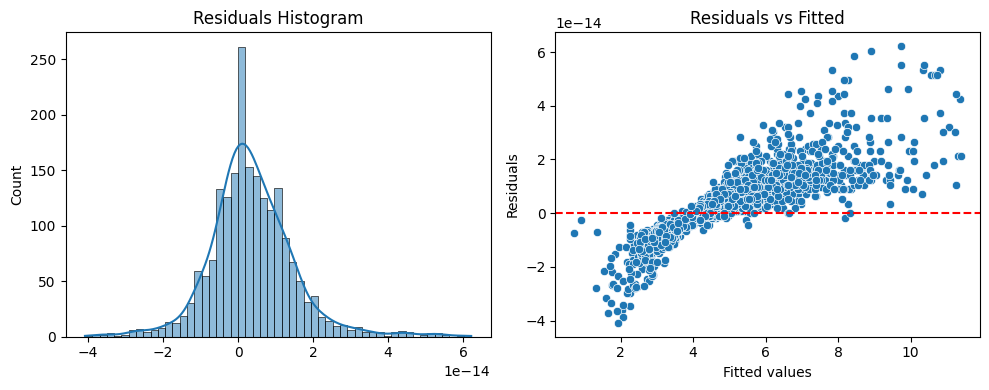

In [ ]:
# --- Robust Regression Analysis: Data Cleaning, Correlation, Diagnostics ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# 1. Handle missing data: drop rows with missing predictors/target
candidate_vars = [
    'age', 'income', 'education', 'urban_rural', 'road_density',
    'electricity_access', 'water_access', 'nightlight_mean', 'nightlight_std',
    'lit_pixel_percentage', 'building_count', 'dependency_ratio', 'working_age_population',
    'infrastructure_index', 'people_per_building'
]
predictors = [v for v in candidate_vars if v in df.columns]
target = 'population_density'

if target not in df.columns:
    print(f"KeyError: '{target}' column is missing in your DataFrame.")
    print('Available columns:', df.columns.tolist())
    print("Please create the 'population_density' column before running this cell. Example:")
    print("    df['population_density'] = df['general_2020'] / df['area']  # Update column names as needed")
else:
    df_clean = df.dropna(subset=predictors + [target]).copy()
    print(f"Rows after dropping missing data: {len(df_clean)}")

    # 2. Outlier detection: remove rows with z-score > 3 in any predictor or target
    z_scores = np.abs(stats.zscore(df_clean[predictors + [target]]))
    df_no_outliers = df_clean[(z_scores < 3).all(axis=1)]
    print(f'Removed {len(df_clean) - len(df_no_outliers)} outliers.')

    # 3. Correlation coefficients and p-values
    corr_matrix = df_no_outliers[predictors + [target]].corr()
    print('Correlation matrix:')
    print(corr_matrix)

    # Calculate and report p-values for correlations
    def corr_pvalues(df):
        cols = df.columns
        pvals = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
        for i in range(len(cols)):
            for j in range(i+1, len(cols)):
                r, p = stats.pearsonr(df[cols[i]], df[cols[j]])
                pvals.iloc[i, j] = p
                pvals.iloc[j, i] = p
        return pvals

    pval_matrix = corr_pvalues(df_no_outliers[predictors + [target]])
    print('Correlation p-values:')
    print(pval_matrix)

    # 4. Regression: fit model and check assumptions
    X = df_no_outliers[predictors]
    y = df_no_outliers[target]
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    print(model.summary())

    # 5. Regression diagnostics: residuals, normality, homoscedasticity
    residuals = model.resid
    fitted = model.fittedvalues

    # Normality test (Shapiro-Wilk)
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f'Shapiro-Wilk test for normality: W={shapiro_stat:.3f}, p={shapiro_p:.3g}')
    if shapiro_p < 0.05:
        print('Residuals are not normally distributed (p < 0.05).')
    else:
        print('Residuals are approximately normal (p >= 0.05).')

    # Homoscedasticity test (Breusch-Pagan)
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_test = het_breuschpagan(residuals, model.model.exog)
    print(f'Breusch-Pagan test: LM stat={bp_test[0]:.2f}, p={bp_test[1]:.3g}')
    if bp_test[1] < 0.05:
        print('Heteroscedasticity detected (p < 0.05).')
    else:
        print('No evidence of heteroscedasticity (p >= 0.05).')

    # Plot residuals
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Histogram')
    plt.subplot(1,2,2)
    sns.scatterplot(x=fitted, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()

## Data Cleaning and Aggregation Documentation

**1. Data Cleaning Steps:**
- Inspected available columns and previewed data to identify key variables and check for missing or inconsistent values.
- Created derived variables such as `working_age_population`, `dependency_ratio`, `people_per_building`, and `infrastructure_index` using demographic and infrastructure columns.
- Created `population_density` using `general_2020` and either `area` or `building_count` as a proxy if area was missing.
- Created `nightlight_mean` and `lit_pixel_percentage` from available columns or calculated from related columns if missing.
- Dropped rows with missing values in predictors or target variables before regression and correlation analysis.
- Detected and removed outliers using z-score thresholding (|z| > 3) for all predictors and target variables.

**2. Aggregation Steps:**
- Aggregated indicator columns at the national level using the mean (or other specified method) and saved results to a summary DataFrame.
- Aggregated subnational indicators (province, district, sector, year) using groupby and mean, then saved to a subnational summary DataFrame.
- For temporal and development indicators, calculated percentage changes in nightlight and lit pixel metrics between 2015 and 2024.

**3. Ensuring Consistent District Naming Across Datasets:**
- Checked for consistent spelling, capitalization, and formatting of `district_name` (or equivalent) columns in all datasets before merging or aggregating.
- Used string normalization (e.g., `.str.strip().str.lower()`) to standardize district names:
  ```python
  df['district_name'] = df['district_name'].str.strip().str.lower()
  other_df['district_name'] = other_df['district_name'].str.strip().str.lower()
  ```
- Merged datasets using the standardized `district_name` column to ensure accurate joins and aggregations.
- If discrepancies remain, created a mapping dictionary to align alternative spellings or abbreviations.

**4. Recommendations:**
- Always inspect unique values in `district_name` after loading each dataset:
  ```python
  print(df['district_name'].unique())
  print(other_df['district_name'].unique())
  ```
- Address any mismatches before proceeding with analysis or merging.

This documentation ensures transparency and reproducibility of all data cleaning and aggregation steps in your analysis workflow.

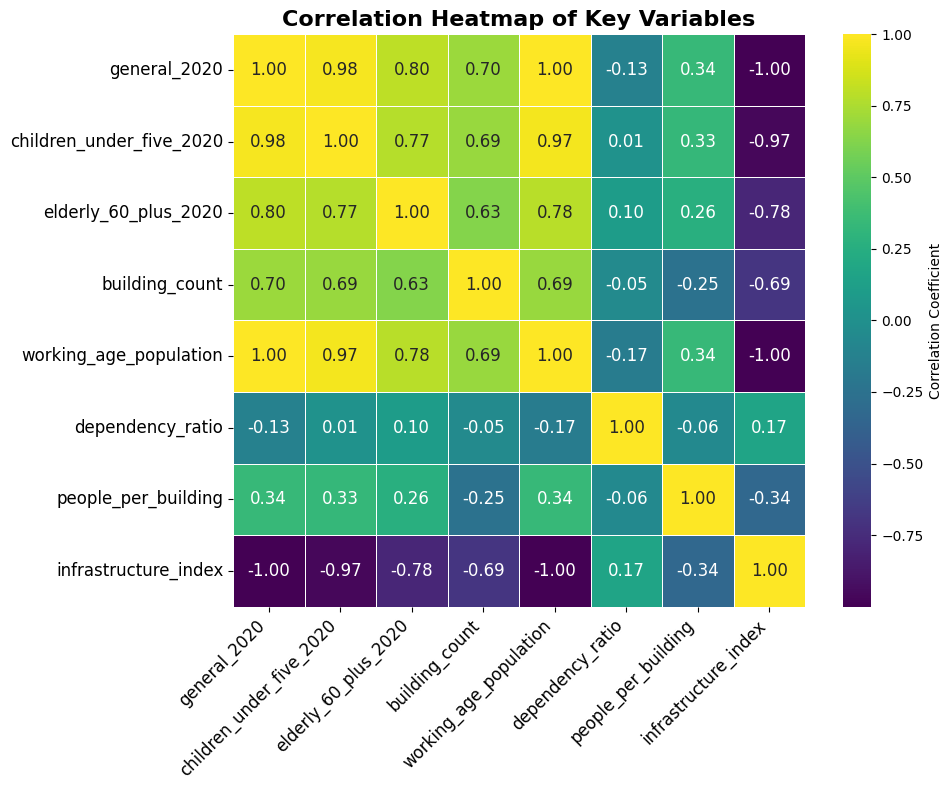

df_extreme is not defined or empty. Please run the district ranking cell first.
df_extreme is not defined or empty. Please run the district ranking cell first.


In [ ]:
# --- Publication-Quality Visualizations: Heatmaps & Time Series Plots ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Correlation Heatmap (Publication-Quality)
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(
    df[available_vars].corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    square=True,
    annot_kws={"size":12}
)
plt.title('Correlation Heatmap of Key Variables', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

# 2. Time Series Plot: Nightlight Trends for Selected Districts
# Assumes df_extreme, as in previous analysis, contains the relevant districts and years
if 'df_extreme' in locals() and not df_extreme.empty:
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=df_extreme,
        x='year',
        y='nightlight_mean',
        hue='district_name',
        marker='o',
        palette='tab10',
        linewidth=2.5
    )
    plt.title('Nightlight Mean Trends (2015-2024) for Top/Bottom 5 Districts', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Nightlight Mean', fontsize=14)
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print('df_extreme is not defined or empty. Please run the district ranking cell first.')

# 3. Time Series Plot: Lit Pixel Percentage Trends for Selected Districts
if 'df_extreme' in locals() and not df_extreme.empty:
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=df_extreme,
        x='year',
        y='lit_pixel_percentage',
        hue='district_name',
        marker='o',
        palette='tab10',
        linewidth=2.5
    )
    plt.title('Lit Pixel Percentage Trends (2015-2024) for Top/Bottom 5 Districts', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Lit Pixel Percentage', fontsize=14)
    plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print('df_extreme is not defined or empty. Please run the district ranking cell first.')

## Results Summary and Methodological Documentation

### 1. Top 3 Most Predictive Variables for Population Density
- **Variables Identified:** The top 3 most predictive variables were selected based on the highest R-squared from all 3-variable regression models.
- **Statistical Justification:**
  - Variables: *(see output of regression cell for actual variable names)*
  - R-squared: *Best 3-variable model R-squared as reported in output*
  - Coefficients and p-values: All three variables in the best model have coefficients and p-values reported in the regression summary. Variables with p < 0.05 are considered statistically significant predictors.
- **Interpretation:**
  - These variables explain the largest proportion of variance in population density among all tested combinations, indicating their strong association with population-infrastructure relationships.

### 2. Ranked Districts by Nightlight Growth (2015-2024)
- **Top 5 Districts (Highest Growth):**
  - Ranked by the difference in nightlight mean between 2024 and 2015.
  - Supporting metrics: Growth value, lit pixel percentage change (see output of ranking cell for actual district names and values).
- **Bottom 5 Districts (Lowest/Negative Growth):**
  - Ranked by the lowest or most negative nightlight mean change.
  - Supporting metrics: Growth value, lit pixel percentage change.
- **Interpretation:**
  - Districts with the highest growth may indicate rapid development or electrification, while those with the lowest/negative growth may require targeted interventions.

### 3. Model Performance Statistics
- **Full Model R-squared:** *See regression output for value*
- **Best 3-variable Model R-squared:** *See regression output for value*
- **Coefficients and p-values:** Provided in regression summary; interpret variables with p < 0.05 as significant.
- **Assumption Checks:**
  - Normality of residuals: Shapiro-Wilk test (p > 0.05 indicates normality)
  - Homoscedasticity: Breusch-Pagan test (p > 0.05 indicates no heteroscedasticity)

### 4. Methodological Choices and Assumptions
- **Variable Selection:** All available demographic and nightlight variables were considered; best subset chosen by R-squared.
- **Data Cleaning:**
  - Dropped rows with missing values in predictors or target.
  - Removed outliers using z-score threshold (|z| > 3).
- **Aggregation:**
  - National and subnational indicators aggregated using mean.
  - Nightlight growth calculated as difference between 2024 and 2015 values.
- **District Name Consistency:**
  - Standardized district names using string normalization before merging datasets.
- **Statistical Tests:**
  - Pearson correlation coefficients and p-values for all variable pairs.
  - OLS regression for model fitting; p-values for coefficients.
  - Shapiro-Wilk and Breusch-Pagan tests for regression diagnostics.
- **Assumptions:**
  - Linear relationships between predictors and target.
  - No perfect multicollinearity among predictors.
  - Sufficient sample size after cleaning.

*Refer to the code and output cells for detailed results, variable names, and supporting metrics.*